# Introduction to Neural Networks

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Part 1: Logistic regression and the neuron

There is a very close link between the logistic regression we discussed in week 6, and a neural net that has no hidden layers, just input and output layers. The code below generates two normally distributed datasets that we give class labels zero and one.

1. Plot a simple histgram of two datasets, just to visualize.

In [118]:
normal = np.random.normal
# Data:
x0 = normal(-1.5, 1, 100)
x1 = normal(1.5, 1, 100)
# labels: 
y0 = np.zeros_like(x0)
y1 = np.ones_like(x1)

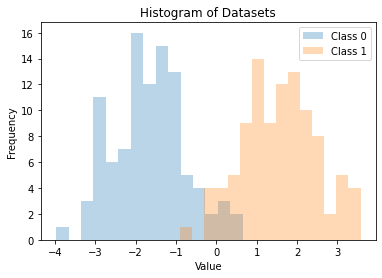

In [119]:
plt.hist(x0,bins=15,alpha=0.3,label='Class 0')
plt.hist(x1,bins=15,alpha=0.3,label='Class 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Datasets')
plt.legend()

2. Concatenate the two arrays x0,x1 to a feature array x, and y0,y1 to a class array y. The feature array must be reshaped to (200, 1), so that the first dimension indexes the example and the second contains the value.

In [120]:
x=np.concatenate((x0,x1))
x=x.reshape(-1, 1)

y=np.concatenate((y0,y1))

print('x shape:',x.shape)
print('y shape:',y.shape)

x shape: (200, 1)
y shape: (200,)


3. Perform logistic regression on the dataset to try to separate the two classes. Use solver='lbfgs'. Make a plot of the predicted probability (from predict_proba()) versus x, and add the data as a scatter plot.

4. Now let's do the same with a single neuron. Import MLPClassifier from sklearn.neural_network. Set *activation="logistic",hidden_layer_sizes=(),solver='lbfgs'* to get a network with no hidden layers. Fit to the data and add the predicted probability from the MLP to the plot you created above. What is the relationship between the neuron and the logistic regression?

##### a single neuron (with no layers) with the sigmoid activation function matches with logistic regression

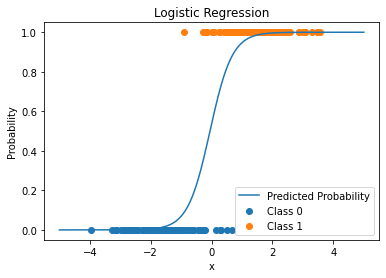

In [121]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs')
model.fit(x,y)

x_vals=np.linspace(-5, 5, 300).reshape(-1, 1)
y_prob=model.predict_proba(x_vals)[:,1]

plt.plot(x_vals,y_prob,label='Predicted Probability')
plt.scatter(x0,y0,label='Class 0')
plt.scatter(x1,y1,label='Class 1')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()

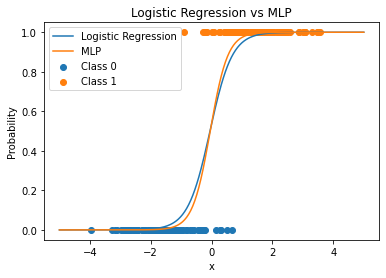

In [122]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(activation='logistic',hidden_layer_sizes=(),solver='lbfgs')
model.fit(x,y)
y_prob_mlp=model.predict_proba(x_vals)[:,1]

plt.plot(x_vals,y_prob,label='Logistic Regression')
plt.plot(x_vals,y_prob_mlp,label='MLP')
plt.scatter(x0,y0,label='Class 0')
plt.scatter(x1,y1,label='Class 1')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Logistic Regression vs MLP')
plt.legend()

## Part 2: Beyond linear regression

In the above example, the two datasets were linearly separable so that logistic regression worked well. Let's now look at a dataset where that is not the case. Run the cell below.

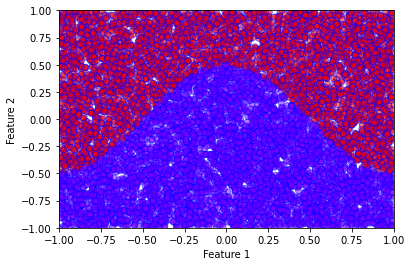

In [123]:
# Construct the dataset
sX = np.random.uniform(low=-1, high=1, size=(10000,2))
sY = np.array([0 if s[1]<=0.5*np.cos(np.pi*s[0]) else 1 for s in sX])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=sY,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

1. Clearly the boundary between the two classes is not linear. Nevertheless, apply logistic regression and plot the prediction in the same manner as in the graph above, coloring the data points by class label. What is the accuracy score? What can logistic regression achieve here?

#### Logistic Regression does not seperate the data correctly

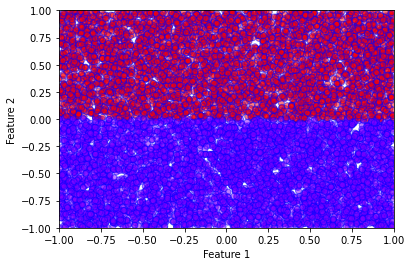

0.8405


In [124]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(sX, sY)

y_pred = lg.predict(sX)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

print(accuracy_score(sY, y_pred))

2. Now let's try to do better with a neural network. Use again the MLPClassifier, activation='logistic', max_iter=1000, solver='lbfgs',random_state=42. Try the single neuron first as in part 1, then make the net "deeper" by giving it hidden layers. Try a single hidden layer with 3 neurons, or 2 hidden layers with 2 neurons each. Any luck separating the data? What accuracy do you get?

#### Yes we have luck separating the data with (3,) and (2,2)

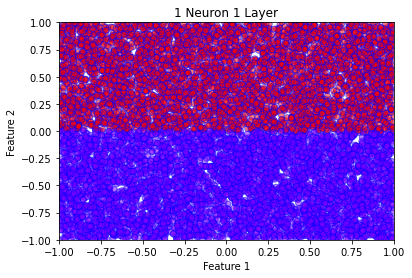

0.8405


In [125]:
from sklearn.neural_network import MLPClassifier

mpl = MLPClassifier(activation='logistic', max_iter=1000, hidden_layer_sizes= (1,), solver='lbfgs',random_state=42)
mpl.fit(sX, sY)
y_pred = mpl.predict(sX)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("1 Neuron 1 Layer")
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

print(accuracy_score(sY, y_pred))

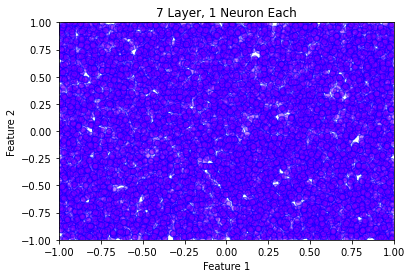

0.5107


In [126]:
from sklearn.neural_network import MLPClassifier

mpl = MLPClassifier(activation='logistic', max_iter=1000, hidden_layer_sizes= (1,1,1,1,1,1,1,), solver='lbfgs',random_state=42)
mpl.fit(sX, sY)
y_pred = mpl.predict(sX)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("7 Layer, 1 Neuron Each")
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

print(accuracy_score(sY, y_pred))

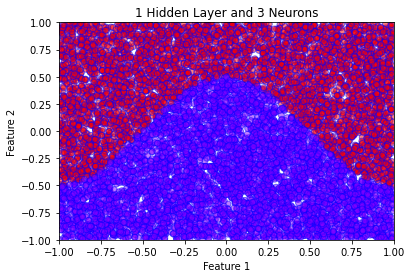

0.9982


In [127]:
mpl = MLPClassifier(activation='logistic', max_iter=1000, hidden_layer_sizes= (3,),solver='lbfgs',random_state=42)
mpl.fit(sX, sY)
y_pred = mpl.predict(sX)

plt.title("1 Hidden Layer and 3 Neurons")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

print(accuracy_score(sY, y_pred))

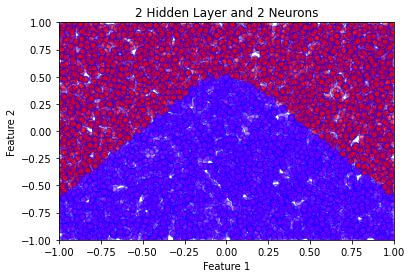

0.9843


In [128]:
mpl = MLPClassifier(activation='logistic', max_iter=1000, hidden_layer_sizes= (2,2),solver='lbfgs',random_state=42)
mpl.fit(sX, sY)
y_pred = mpl.predict(sX)

plt.title("2 Hidden Layer and 2 Neurons")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

print(accuracy_score(sY, y_pred))

# Part 3: Solving the XOR problem with neural nets

As discussed in textbook and lecture, the XOR problem can be solved with two coupled neurons. Below are example data and true labels for this problem.
1. Try to solve this classification using the MLPClassifier, solver='lbfgs',random_state=42. Try different activation functions and print the predictions you get. Can you find an architecture that works (consulting the textbook allowed!).

#### Tanh works when using two coupled neurons (2,2)

In [129]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([0,1,1,0])

In [130]:
# Default 
mpl = MLPClassifier(solver='lbfgs',random_state=42,  hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

y_pred = mpl.predict(inputs)
print("Default: ",y_pred)

# Identity
mpl = MLPClassifier(solver='lbfgs',random_state=42, activation="identity",hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

y_pred = mpl.predict(inputs)
print("identity:",y_pred)

# Logistic
mpl = MLPClassifier(solver='lbfgs',random_state=42, activation="logistic", hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

y_pred = mpl.predict(inputs)
print("Logistic:",y_pred)

# Tanh
mpl = MLPClassifier(solver='lbfgs',random_state=42, activation="tanh",hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

y_pred = mpl.predict(inputs)
print("Tanh:    ",y_pred)

Default:  [1 1 1 0]
identity: [0 1 1 1]
Logistic: [1 0 1 0]
Tanh:     [0 1 1 0]


2. Use DecisionBoundaryDisplay (see week 2) to produce a graph that looks like fig. 8.2 in the textbook.

Text(0.5, 1.0, 'Relu')

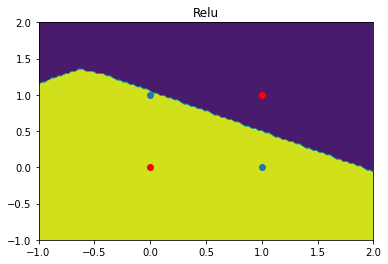

In [131]:
from sklearn.inspection import DecisionBoundaryDisplay

mpl = MLPClassifier(solver='lbfgs',random_state=42, hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

disp = DecisionBoundaryDisplay.from_estimator(mpl, inputs, response_method="predict")
plt.scatter(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], color='red')
plt.scatter(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1])
plt.title("Relu")

Text(0.5, 1.0, 'Identity')

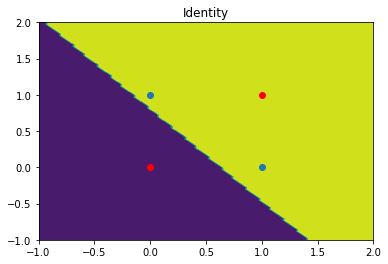

In [132]:
from sklearn.inspection import DecisionBoundaryDisplay

mpl = MLPClassifier(solver='lbfgs',random_state=42, activation="identity",hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

disp = DecisionBoundaryDisplay.from_estimator(mpl, inputs, response_method="predict")


plt.scatter(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], color='red')
plt.scatter(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1] )
plt.title("Identity")

Text(0.5, 1.0, 'Logistic')

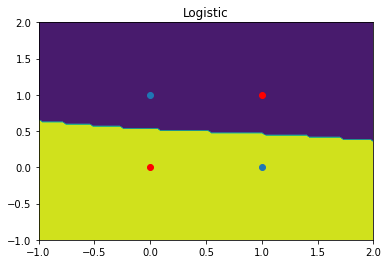

In [133]:
from sklearn.inspection import DecisionBoundaryDisplay

mpl = MLPClassifier(solver='lbfgs',random_state=42, activation="logistic",hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

disp = DecisionBoundaryDisplay.from_estimator(mpl, inputs, response_method="predict")

plt.scatter(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], color='red')
plt.scatter(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1] )
plt.title("Logistic")

Text(0.5, 1.0, 'Tanh')

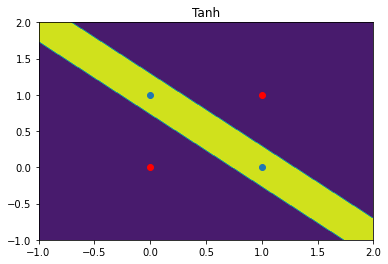

In [134]:
from sklearn.inspection import DecisionBoundaryDisplay

mpl = MLPClassifier(solver='lbfgs',random_state=42, activation="tanh",hidden_layer_sizes= (2,2))
mpl.fit(inputs,expected_output)

disp = DecisionBoundaryDisplay.from_estimator(mpl, inputs, response_method="predict")
plt.scatter(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], color='red')
plt.scatter(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1])
plt.title("Tanh")

## Part 4: A dense neural network with keras and tensorflow

From now on, we will upgrade our neural network computation by using tensorflow with the keras backend. You might need to add this to your installation, perhaps in a separate environment for better version control.

Tensorflow is a very commonly used library used in development of Deep Learning models. It is an open-source platform that was developed by Google. It supports programming in several languages, e.g. C++, Java, Python, and many others.

Keras is a high-level API (Application Programming Interface) that is built on top of TensorFlow (or Theano, another Deep Learning library). It is Python-specific, and we can think of it as the equivalent of the sklearn library for neural network. It is less general, and less customizable, but it is very user-friendly and comparatively easier than TensorFlow. We will use keras with the tensorflow back-end.

In [135]:
import tensorflow as tf
import keras

For a first experiment, we will check out the famous MNIST dataset. Each data sample in the MNIST dataset, a 28×28
 grayscale image, comes with a label, which holds the information which digit is stored in the image. The difficulty of learning to recognize the digits is that handwriting styles are incredibly personal and different people will write the digit “4” slightly differently. It would be very challenging to hardcode all the criteria to recognize “4” and not confuse it with, say, a “9”.

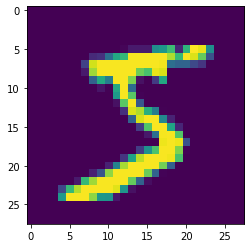

In [136]:
# Load Dataset 
(x_train , y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

# Standardise the data to have a spread of 1
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[0]);

In [137]:
# Here is our first NN model with keras:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

What is the architecture of this network? What is 'softmax' and why is it used here?

#### input layer flattens the input array from (28,28) to 784
#### hidden layer has 24 neurons with the relu activation
#### output layer has 10 classes corresponding to the 10 digits

#### Softmax is the normalized exponential function

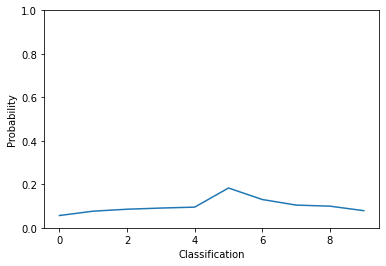

In [138]:
# Lets look at the model's prediction before training it
pred = model(x_train[0:1])
plt.plot(pred[0])
plt.ylim([0,1])
plt.xlabel('Classification')
plt.ylabel('Probability')
plt.show()

How do you interpret this result?
#### 7 seems to have the highest probability, however none are that high and are relatively close in probability

In [139]:
# Compile and train the model
# run the cell, takes a bit of time
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3667 - accuracy: 0.8984 - val_loss: 0.2174 - val_accuracy: 0.9342
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2071 - accuracy: 0.9406 - val_loss: 0.1826 - val_accuracy: 0.9469
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1727 - accuracy: 0.9498 - val_loss: 0.1595 - val_accuracy: 0.9522
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1501 - accuracy: 0.9564 - val_loss: 0.1447 - val_accuracy: 0.9565
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1332 - accuracy: 0.9609 - val_loss: 0.1396 - val_accuracy: 0.9598
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1203 - accuracy: 0.9645 - val_loss: 0.1258 - val_accuracy: 0.9627
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1112 - accuracy: 0.9673 - val_loss: 0.1265 - val_accuracy:

Repeat the plot from before training with the fitted model. Are you satisfied with the result?

### yes, 5 is the highest prob, and the image potentially looks like a 5

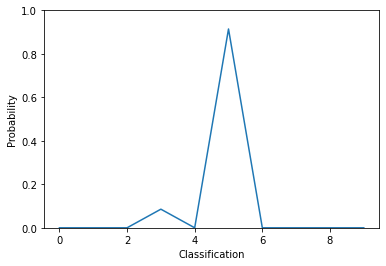

In [140]:
pred = model(x_train[0:1])
plt.plot(pred[0])
plt.ylim([0,1])
plt.xlabel('Classification')
plt.ylabel('Probability')
plt.show()

Let's look at the information in the history attribute. Run print(history.history.keys()), which shows you the labels to access training and validation score and loss, resp. Make two graphs of these scores and losses, respectively, versus number of training "epochs". Should we train more?

#### Yes, in both accuracy and loss they improve over time.

In [141]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


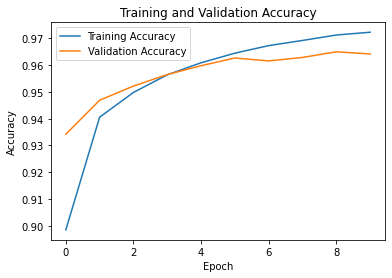

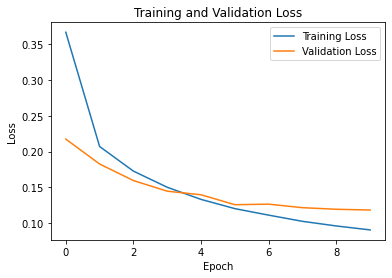

In [142]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()